In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1) 
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # wave 1 
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2 
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + noise 
    return series[..., np.newaxis].astype(np.float32)

In [73]:
data = np.load("surface_temp.npy")
data_max = max(data)
data_norm = data/data_max
y = data.reshape(1,1000)
X = generate_time_series(1,1000)

In [72]:
max(data)

374.3922541812298

In [74]:
model = keras.models.Sequential([
      keras.layers.SimpleRNN(1, activation='tanh', return_sequences=False, input_shape=[None, 1])
])

model.compile(loss="mse", optimizer="adam")

history = model.fit(X, y, epochs=20)


Epoch 1/20
1/1 [==============================] - 0s 401ms/step - loss: 139333.8281
Epoch 2/20
1/1 [==============================] - 0s 41ms/step - loss: 139323.3594
Epoch 3/20
1/1 [==============================] - 0s 40ms/step - loss: 139311.1719
Epoch 4/20
1/1 [==============================] - 0s 40ms/step - loss: 139299.7344
Epoch 5/20
1/1 [==============================] - 0s 41ms/step - loss: 139290.4531
Epoch 6/20
1/1 [==============================] - 0s 43ms/step - loss: 139282.4219
Epoch 7/20
1/1 [==============================] - 0s 42ms/step - loss: 139274.9688
Epoch 8/20
1/1 [==============================] - 0s 41ms/step - loss: 139267.9062
Epoch 9/20
1/1 [==============================] - 0s 41ms/step - loss: 139261.2188
Epoch 10/20
1/1 [==============================] - 0s 40ms/step - loss: 139254.8281
Epoch 11/20
1/1 [==============================] - 0s 41ms/step - loss: 139248.7344
Epoch 12/20
1/1 [==============================] - 0s 41ms/step - loss: 139242.8750


In [77]:
n_steps = 1000
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:] 
X = X_new
for step_ahead in range(10):
        y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
        X = np.concatenate([X, y_pred_one], axis=1)
Y_pred = X[:, n_steps:]
print(Y_pred)

1/1 [==============================] - 0s 22ms/step
[[[-0.20007174]
  [-0.22518298]
  [-0.19967553]
  [-0.22559716]
  [-0.19926101]
  [-0.22601908]
  [-0.19882777]
  [-0.22644931]
  [-0.19837536]
  [-0.22688833]]]


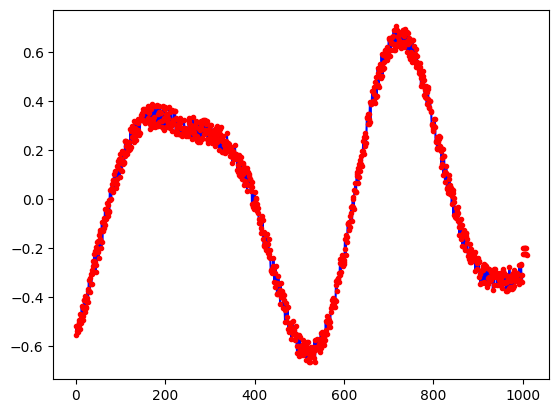

In [78]:
plt.plot(X_new[0],'b')
plt.plot(X[0],'r.')